### Test

In this notebook, we explore the performane of the developed Affinity Propagation algorithm on a fake dataset. We then apply other clustering algorithms to this dataset and compare their performance with our algorithm. At the end, we assess the performance of the Affinity Propagation on a non-spherical dataset.

#### import Affinity Propagation Source Code

In [1]:
AffinityPackage_import_type=['load_installed_package','load_from_directory'][0]

In [2]:
if AffinityPackage_import_type=='load_installed_package':
    """pip install -i https://test.pypi.org/simple/ AffinityPropagation-RezaLevin2020-pkg-DukePhDs==0.0.3"""
    from AffinityPropagation_RezaLevin2020_pkg import Src_AP_V13 as AfP
else:
    """can be found in this repository: https://github.com/MReza89/Stat663_Spring2020_FinalProject_RezaLevin"""
    import Src_AP_V13 as AfP # requires to have Src_AP_V13.py in the current directory

#### import libraries related to testing

In [3]:
import sklearn.cluster as cluster
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import datasets
#from sklearn_extra.cluster import KMedoids
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
import time

In [4]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

##### Data 

In [5]:
# functions for load or save a dictionary
import pickle
def save_obj(obj, obj_name):
    with open('.'+'/'+ obj_name+ '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(obj_name):
    with open('.'+'/'+ obj_name+'.pkl', 'rb') as f:
        return pickle.load(f)    

In [6]:
def make_fake_2d_data(N_data_E_category=[20,20,20,20,20],Scnd_d=2,Visualization=True):
    
    """ 
    a function for creating fake data to check the performance of the affinity propagation algorithm
    User can adjust the number of categories along with the number of data in each one \
    (to chaeck the performance of algorithm for imbalanced data)
    #Scnd_d=2  number of features of the data (for the purpose of visualization,the default is 2)
    """
    np.random.seed(3)
    for i,N in enumerate(N_data_E_category):        
        size = (N, Scnd_d)
        
        if i==0:
            Data_i = np.random.normal(0, 1, size)
            Data=Data_i
        else:
            center = np.random.rand(2) * 10
            Data_i=np.random.normal(center, .5, size)
            Data=np.r_[Data,Data_i]
    
    
    N_category=len(N_data_E_category)  
    if (N_category<8 and Scnd_d==2 and Visualization==True):
        
        color_list=list('bgrcmyk')[:N_category]
        c = [c for s in [v * N for v,N in zip(color_list,N_data_E_category)] for c in list(s)]
        plt.figure(figsize=(15, 6))
        plt.title('Some clusters in 2d space')
        plt.scatter(Data[:, 0], Data[:, 1], c=c)
        plt.show()
    return Data

#### Data Visulaization Functions

In [7]:
def plot_2d_data(Data_X):
    plt.figure(figsize=(15, 6))        
    plt.scatter(Data_X[:, 0], Data_X[:, 1])
    plt.show()
    
    

#### Selecting Dataset from the available ones

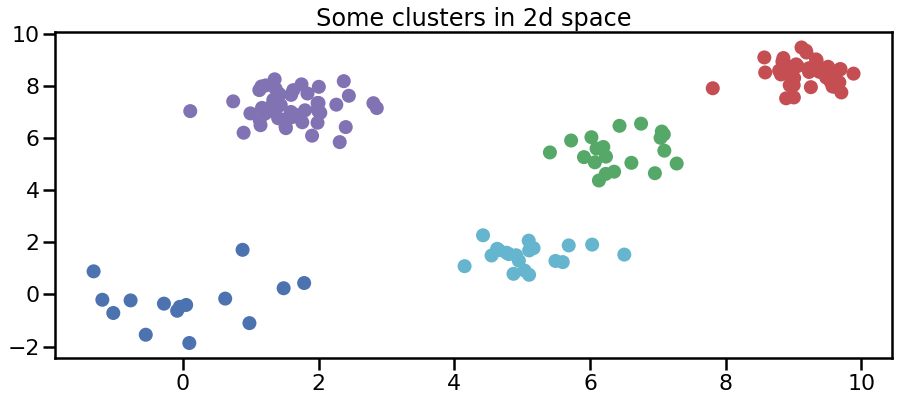

In [8]:
Interested_Dataset=['fake_data','iris_data','Environmental_data'][0]
if Interested_Dataset=='fake_data':
    N_data_E_category_balanced_imbalanced=[[30,30,30,30,30],[15,20,40,20,50]][1]
    Data_Input=make_fake_2d_data(N_data_E_category=N_data_E_category_balanced_imbalanced)
elif Interested_Dataset=='iris_data':    
    iris = datasets.load_iris()
    Data_Input = iris.data
    plot_2d_data(Data_Input)
elif Interested_Dataset=='Environmental_data':
     
    BCF_Elevation=np.load("BCF_Elevation.npy")
    Data_Input =BCF_Elevation[ np.random.choice(np.arange(BCF_Elevation.shape[0]),1000),:]
    plot_2d_data(Data_Input)
else:
    print("the Interested dataset is not available")



#### Vectorized implementation

In [9]:
%%time
exemplars,labels,Cluster_Centers,last_iteration=AfP.affinity_propagation(Data_Input,max_iter=200,
                                                                         Plot_Clusters=False)

[ 7 21 62 89 98] 81
CPU times: user 137 ms, sys: 21 ms, total: 158 ms
Wall time: 62.5 ms


In [10]:
#### Plain implementation

In [11]:
%%time
exemplars,labels,Cluster_Centers,last_iteration=AfP.affinity_propagation(Data_Input,max_iter=200,
                                                                         Plot_Clusters=False,
                                                                         Version_Fast=False)

[ 7 21 62 89 98] 81
CPU times: user 31.5 s, sys: 338 ms, total: 31.8 s
Wall time: 32.8 s


In [12]:
22600/50.9

444.00785854616896

[ 7 21 62 89 98] 81


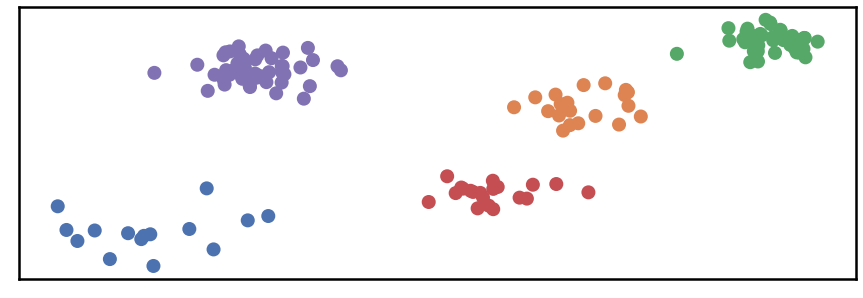

CPU times: user 422 ms, sys: 25.7 ms, total: 447 ms
Wall time: 130 ms


In [13]:
%%time
exemplars,labels,Cluster_Centers,last_iteration=AfP.affinity_propagation(Data_Input,max_iter=200,Plot_Clusters=True)

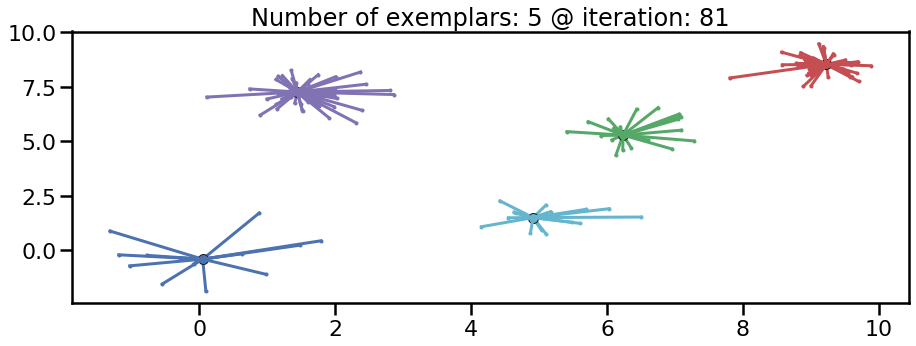

In [14]:
fig= AfP.plot_iteration(last_iteration,labels,exemplars,Data_Input,Draw_lines=True)

#### Make a gif of Affinity Propagation Process

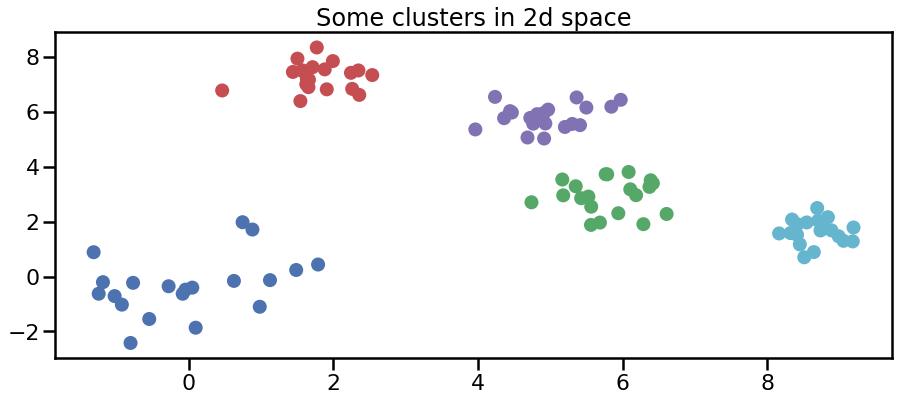

[ 7 11 31 53 61 93] 52


In [15]:
_,_,_,_,figures_AF=AfP.affinity_propagation(Data_X_samples=make_fake_2d_data(N_data_E_category=[20,20,20,20,20]),\
                                      Plot_Clusters=False,Visulization_track=True,Draw_lines=True)
AfP.make_gif(figures_AF, 'Affinity_Propagation.gif', 2)

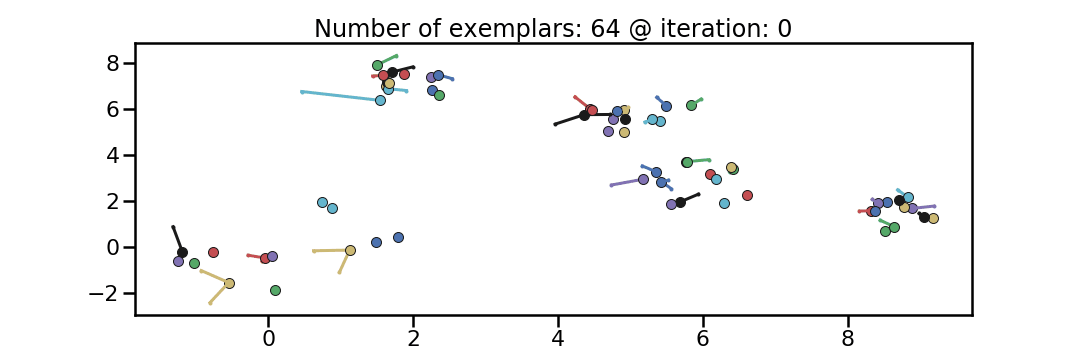

In [16]:
from IPython.display import Image
with open('Affinity_Propagation.gif','rb') as file:
    display(Image(file.read()))

### Compareing with Skit-Learn

In [17]:
def Sklearn_clusters(data, algorithm, args, kwds, Plot_Clusters=True,**plot_kwds):
    """ a function for performing clustering with Skit-Learn library"""
    
    start_time = time.time()
    #######
    #labels = algorithm(*args, **kwds).fit_predict(data)
    model=algorithm(*args, **kwds).fit(data)
    labels=model.labels_
    if algorithm==cluster.AffinityPropagation:
        cluster_centers_indices=model.cluster_centers_indices_
        cluster_centers=model.cluster_centers_
    if algorithm==cluster.KMeans:
        cluster_centers=model.cluster_centers_
#     if algorithm==KMedoids:
#         cluster_centers_indices=model.medoid_indices_
#         cluster_centers=model.cluster_centers_
    ####
    end_time = time.time()
    
    if Plot_Clusters==True:
        plot_clusters(data,gapless_labels=labels,**plot_kwds)
   
    #plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    if algorithm==cluster.AffinityPropagation:
        return labels,cluster_centers_indices,cluster_centers
    if algorithm==cluster.KMeans:
        return labels,cluster_centers
#     if algorithm==KMedoids:
#         return labels,cluster_centers_indices,cluster_centers
    else:
        return labels
    

    #plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
def plot_clusters(data,gapless_labels,**plot_kwds):
    fig = plt.figure(figsize=(15, 5))
    palette = sns.color_palette(palette='deep', n_colors=np.unique(gapless_labels).max() + 1)
    
    colors = [palette[x] for x in gapless_labels] #[palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.show()    

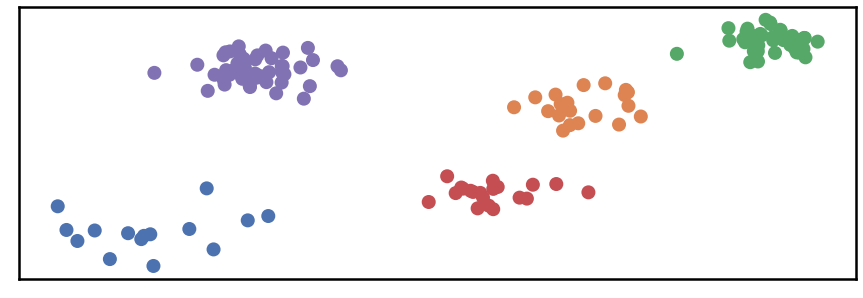

Clustering took 0.02 s
CPU times: user 245 ms, sys: 26.9 ms, total: 272 ms
Wall time: 105 ms


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [18]:
%%time
args=()
kwds={'damping':0.5}
labels_SK,cluster_centers_indices_SK,cluster_centers_SK=Sklearn_clusters(Data_Input, cluster.AffinityPropagation, args, kwds)
labels_SK

In [19]:
print("Exemplars found by SKlearn: \n",np.unique(cluster_centers_indices_SK))
print("Exemplars found by Implemented Algorithm: \n",np.unique(labels))

Exemplars found by SKlearn: 
 [  7  21  62  89 137]
Exemplars found by Implemented Algorithm: 
 [ 7 21 62 89 98]


In [20]:
print("Cluster centers found by SKlearn: \n",cluster_centers_SK)
print("Cluster centers found by Implemented Algorithm: \n",Cluster_Centers)


Cluster centers found by SKlearn: 
 [[ 0.05003364 -0.40467741]
 [ 6.2357842   5.28411043]
 [ 9.22853636  8.52996483]
 [ 4.91227916  1.50120253]
 [ 1.59422974  6.99662284]]
Cluster centers found by Implemented Algorithm: 
 [[ 0.05003364 -0.40467741]
 [ 6.2357842   5.28411043]
 [ 9.22853636  8.52996483]
 [ 4.91227916  1.50120253]
 [ 1.44358573  7.26196569]]


In [21]:
from sklearn.metrics import pairwise_distances_argmin
def predict_cluster(Data_points,Cluster_centers):
    """ assigning each data point to a cluster by finding the minimum distance between each point and cluster centers"""
    return pairwise_distances_argmin(Data_points,Cluster_centers)

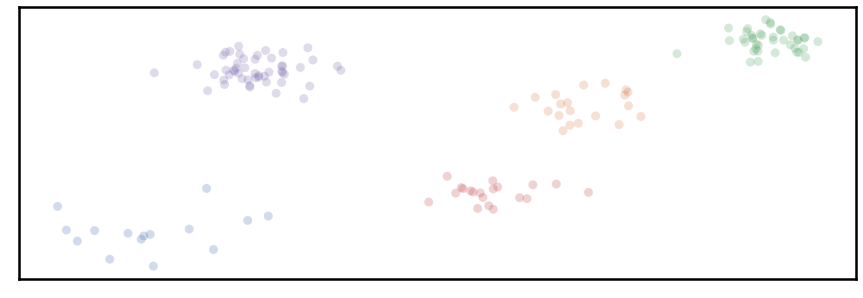

In [22]:
plot_clusters(Data_Input,gapless_labels=predict_cluster(Data_Input,Cluster_Centers) ,**plot_kwds)

## Comaprison with other clustering algorithm

#### K-Means

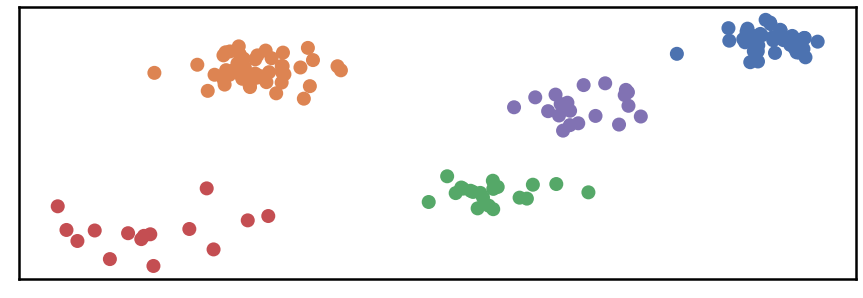

Clustering took 0.03 s


array([0, 1, 2, 3, 4], dtype=int32)

In [23]:
labels_SK,cluster_centers_SK=Sklearn_clusters(Data_Input, cluster.KMeans, (), {'n_clusters':5})
#labels_SK=Sklearn_clusters(Data_Input, cluster.AffinityPropagation, args, kwds)
np.unique(labels_SK)

#### Spectral Clustering

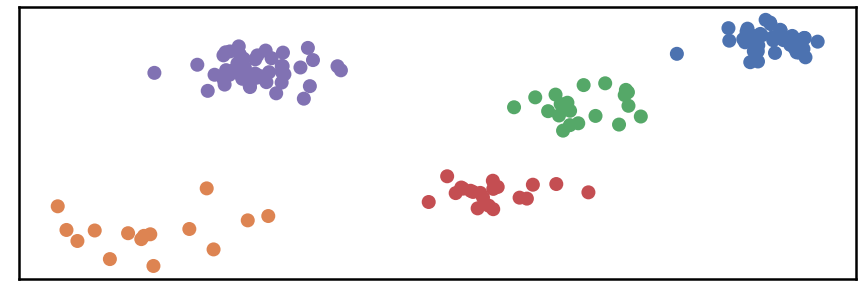

Clustering took 0.06 s


array([0, 1, 2, 3, 4], dtype=int32)

In [24]:
labels_SK=Sklearn_clusters(Data_Input, cluster.SpectralClustering, (), {'n_clusters':5})
np.unique(labels_SK)

#### Agglomerative Clustering

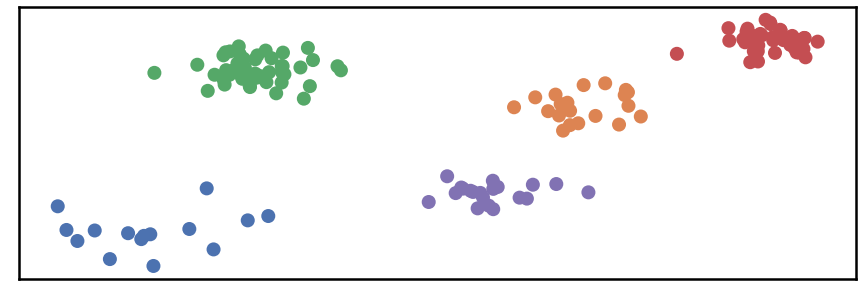

Clustering took 0.00 s


array([0, 1, 2, 3, 4])

In [25]:
labels_SK=Sklearn_clusters(Data_Input, cluster.AgglomerativeClustering, (), {'n_clusters':5, 'linkage':'ward'})
np.unique(labels_SK)

### Gaussin Mixture Model (GMM)

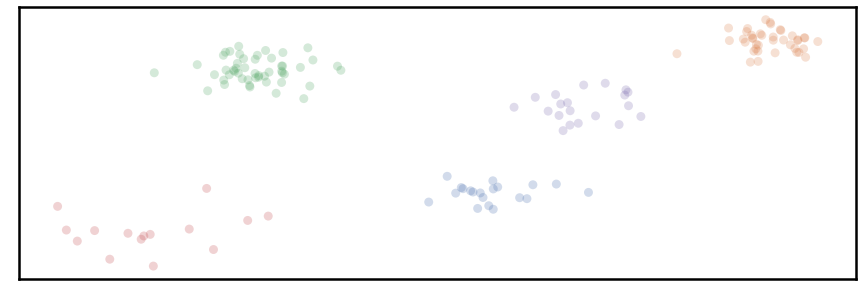

In [26]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=5)
#Predict the clusters on all the data
clusters = model.fit_predict(Data_Input)
plot_clusters(Data_Input,clusters,**plot_kwds)

#### Performance of Affinity Propagation on non-spherical clusters

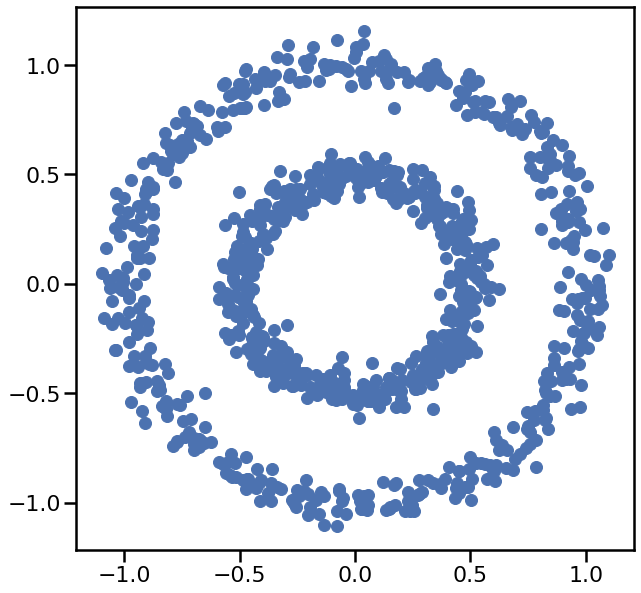

In [27]:
import sklearn.datasets
n_samples = 1000
X = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'bo')
plt.show()

[598 914] 92


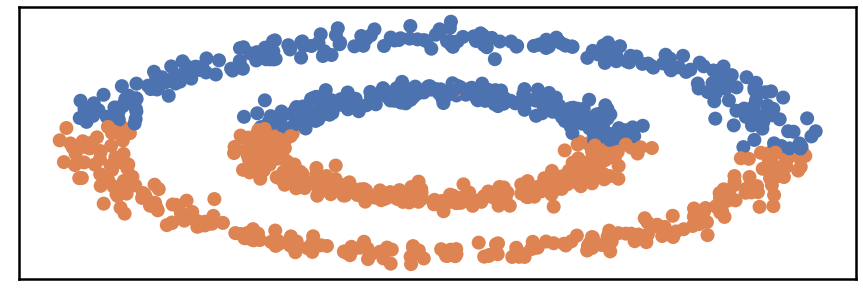

CPU times: user 11.1 s, sys: 1.16 s, total: 12.3 s
Wall time: 4.6 s


In [28]:
%%time
exemplars,labels,Cluster_Centers,last_iteration=AfP.affinity_propagation(X,preference=-400,max_iter=200,Plot_Clusters=True)

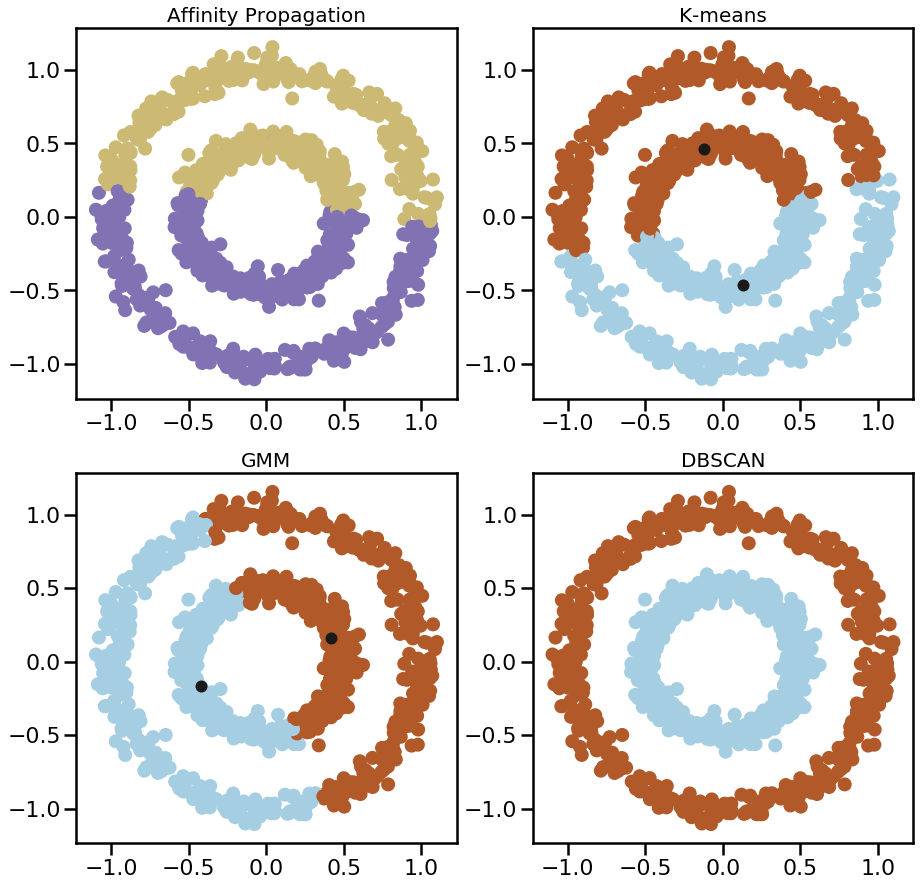

In [32]:

fig, ax = plt.subplots(2,2,figsize=(15,15))

#Set 2 clusters
k = 2
#K-means
model = sklearn.cluster.KMeans(n_clusters=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
#plt.figure(figsize=(13,5))
#plt.subplot(121)
ax[0,1].set_title('K-means',fontsize=20)
ax[0,1].scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
ax[0,1].scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='k',s=100)

#GMM
model = GaussianMixture(n_components=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters = model.predict(X)
#plt.subplot(122)
ax[1,0].set_title('GMM',fontsize=20)
ax[1,0].scatter(X[:,0],X[:,1],c=clusters,cmap=plt.get_cmap('Paired'))
ax[1,0].scatter(model.means_[:,0],model.means_[:,1],c='k',s=100)

Xt=X[:1000,:]
#Set 2 clusters
k = 2
#model = sklearn.cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
model = cluster.DBSCAN(eps=0.15, min_samples=5)
#Predict the clusters on all the data
clusters = model.fit_predict(Xt)
# plt.figure(figsize=(13,5))
# plt.subplot(121)
ax[1,1].set_title('DBSCAN',fontsize=20)
ax[1,1].scatter(Xt[:,0],Xt[:,1],c=clusters,cmap=plt.get_cmap('Paired'))

#plt.figure(figsize=(13, 5))
#plt.subplot(121)
palette = sns.color_palette(palette='deep', n_colors=np.unique(labels).max() + 1)
colors = [palette[x] for x in labels] #[palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
ax[0,0].scatter(X.T[0], X.T[1], c=colors)
# frame = plt.gca()
ax[0,0].set_title('Affinity Propagation', fontsize=20)
#frame.axes.get_xaxis().set_visible(False)
#frame.axes.get_yaxis().set_visible(False)
# plt.show()
pass

We observe that Affnity Proagation, like GMM and Kmeans, fails to find the appropriate clusters (beacuse of the default similarity metric which is Euclidean distance).  
For such a dataset, we can transform the data from Cartesian coordinates to polar ones. This would help these algorithms to find the same clusters as found by DBSCAN algorithm.